In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [2]:
data_train= "Curso_aprendizaje_estadistico/Assesment/dataset/train_catvnoncat.h5"
train_dataset = h5py.File(data_train, "r")
 
data_test= "Curso_aprendizaje_estadistico/Assesment/dataset/test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")


In [3]:
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [4]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


In [5]:
np.shape(xtrain)

(209, 64, 64, 3)

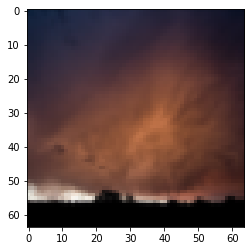

In [6]:
plt.imshow(xtrain[208])

In [7]:
np.shape(xtrain[0])

(64, 64, 3)

In [8]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [9]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [10]:
len(xtrain_[208])

12288

In [11]:
64*64*3

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]} 
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]) 
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topologia de la red.

1. Construir un algorítmo que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa:

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

activation=[None, relu, relu, relu, ...,sigmoid]

  - $\mathrm{n_x}$: valores de entrada
  - $\mathrm{n_{h1}}$: hidden layer 1 
  - $\mathrm{n_{h2}}$: hidden layer 2
  - $\mathrm{n_y}$: last layer 



Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```
    

2. Construir un generalizacion de la red, en el que entrada el valor inicial 
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```
3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


4. Construir un codigo que permita realizar el BackwardPropagation 


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) 
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima: 

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


In [12]:
import numpy as np
import sympy as sp

In [13]:
m = 2*np.random.random((2, 2)) - 1

In [14]:
sp.Matrix(m)

Matrix([
[0.785982591569623,  0.879987307872429],
[0.624912795776464, -0.782821049385901]])

In [22]:
class layer_nn():
    def __init__(self, func_act, nn_present, nn_before):
        np.random.seed(0) 
        self.theta = 2*np.random.random((nn_present, nn_before)) - 1
        self.b = 2*np.random.random((nn_present, 1))-1
        self.func_acti = func_act

    def output(self, A, Z):
        self.A = A
        self.Z = Z


def activation_function(name, x):

    if (name=="sigmoid"):
        f = lambda x: 1/(1+np.exp(-x))
        fp = f(x)*(1-f(x))
        return f(x), fp

    elif (name=="tanh"):
        f =  lambda x: np.tanh(x)
        fp = 1/np.cosh(x)**2
        return f(x), fp

    else:
        return "Error"


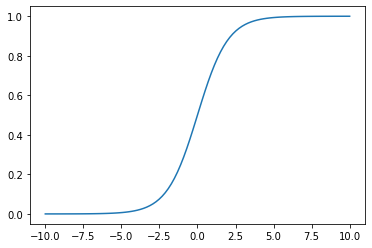

In [23]:
x = np.linspace(-10, 10, 100)
plt.plot(x, activation_function("sigmoid", x)[0])

In [24]:
64*64*3

12288

In [25]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]

In [26]:
# self.theta = 2*np.random.random((nn_present, nn_before)) - 1
# def __init__(self, func_act, nn_present, nn_before):
l1 = layer_nn("sigmoid",3, nx)
l2 = layer_nn("sigmoid", 4, 3)
l3 = layer_nn("sigmoid", 7, 4)
l4 = layer_nn("sigmoid",1, 7)


In [27]:
# Incializacion de la arquitectura de la red 
red_nn = [l1, l2, l3, l4]

In [28]:
red_nn[0].func_acti

'sigmoid'

In [29]:
# Valores iniciales 
A0 = xtrain_.T

In [30]:
np.shape(A0)

(12288, 209)

In [31]:
#np.shape(l1.theta)

In [32]:
np.shape(l1.theta@A0)

(3, 209)

In [33]:
np.shape(l1.theta@A0 )

(3, 209)

In [34]:
np.shape(l1.b.repeat(209, axis = 1))

(3, 209)

# layer 1

In [35]:
Z1 = l1.theta@A0 + l1.b
A1, A1p = activation_function(l1.func_acti, Z1)

# layer 2

In [36]:
Z2 = l2.theta@A1 + l2.b
A2,A2p = activation_function(l2.func_acti, Z2)

# layer 3

In [37]:
Z3 = l3.theta@A2 + l3.b
A3, A3p = activation_function(l3.func_acti, Z3)

# layer 4

In [38]:
Z4 = l4.theta@A3 + l4.b
A4, A4p = activation_function(l4.func_acti, Z4)

In [39]:
np.shape(A4)

(1, 209)

In [40]:
ref=A4[0].copy()

In [41]:
ref

array([0.79520347, 0.79403978, 0.79408277, 0.79552549, 0.79708776,
       0.79552101, 0.7955254 , 0.79485465, 0.7955255 , 0.79403898,
       0.7955255 , 0.79551024, 0.79403919, 0.79403903, 0.79403898,
       0.79517149, 0.7955254 , 0.79404427, 0.79536398, 0.79461419,
       0.79406441, 0.79551099, 0.79403898, 0.7955255 , 0.79405427,
       0.79550467, 0.794039  , 0.79540488, 0.7940965 , 0.79552547,
       0.79552572, 0.79403922, 0.79403899, 0.79544083, 0.79708762,
       0.79427309, 0.79403898, 0.79403898, 0.7943316 , 0.794039  ,
       0.79403898, 0.79795679, 0.79552497, 0.79403898, 0.7954865 ,
       0.79474334, 0.79552549, 0.79480875, 0.79404112, 0.79403899,
       0.7940391 , 0.79552549, 0.79403898, 0.795499  , 0.79706599,
       0.79498499, 0.79404756, 0.79550321, 0.79545161, 0.79404261,
       0.79539081, 0.794039  , 0.79408678, 0.79552479, 0.79403898,
       0.79420212, 0.79403898, 0.79404142, 0.7955255 , 0.79403899,
       0.79546736, 0.79404767, 0.79404278, 0.7982276 , 0.79477

# Generalizacion Forward Pass

In [42]:
class layer_nn():
  def __init__(self, func_act, nn_present, nn_before):
    np.random.seed(0) 
    self.theta = 2*np.random.random((nn_present, nn_before)) - 1
    self.b = 2*np.random.random((nn_present, 1))-1
    self.func_acti = func_act

  def output(self, A, Ap, Z):
    self.A = A
    self.Ap = Ap
    self.Z = Z


def activation_function(name, x):
  if (name=="sigmoid"):
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f(x), fp
  
  elif (name=="tanh"):
    f =  lambda x: np.tanh(x)
    return f(x)
  else :
    return "Error"


In [43]:
nx = 12288
Topology = [nx,3, 4, 7, 1 ]
func_act = ["sigmoid","sigmoid", "sigmoid", "sigmoid", "sigmoid" ]

In [44]:
def init_nn(Topology, func_act):
  L=len(Topology)
  nn = []
  for i in range(1, L):    
    li = layer_nn(func_act[i],Topology[i], Topology[i-1])
    nn.append(li)
  return nn


In [45]:
nn = init_nn(Topology, func_act)

In [46]:
def forward_pass(A0, nn):
  L = len(nn)
  update_nn = nn.copy ()
  for i in range(0, L):

    Zi = nn[i].theta@A0+nn[i].b
    Ai, Aip = activation_function(nn[i].func_acti, Zi)
    update_nn[i].A = Ai
    update_nn[i].Ap = Aip
    update_nn[i].Z = Zi
    A0 = Ai
  
    # self.A = A
    # self.Ap = Ap
    # self.Z = Z

  return A0, update_nn

In [47]:
A0, nn_update = forward_pass(A0, nn)

In [48]:
nn_update

In [49]:
# self.theta = 2*np.random.random((nn_present, nn_before)) - 1
# def __init__(self, func_act, nn_present, nn_before):
l1 = layer_nn("sigmoid",3, nx)
l2 = layer_nn("sigmoid", 4, 3)
l3 = layer_nn("sigmoid", 7, 4)
l4 = layer_nn("sigmoid",1, 7)



\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}




# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) 
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima: 

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```